# Лабораторная работа №3
# Методы восстановления плотности
# Задание на лабораторную работу:
- Сгенерировать на плоскости по 3-4 точки разных классов методом sclearn, восстановить плотность, нарисовать ядерную оценку.
- Взять табличный dataset (например pandas), где есть числовые признаки и они распределены, восстановить плотность на реальных данных.

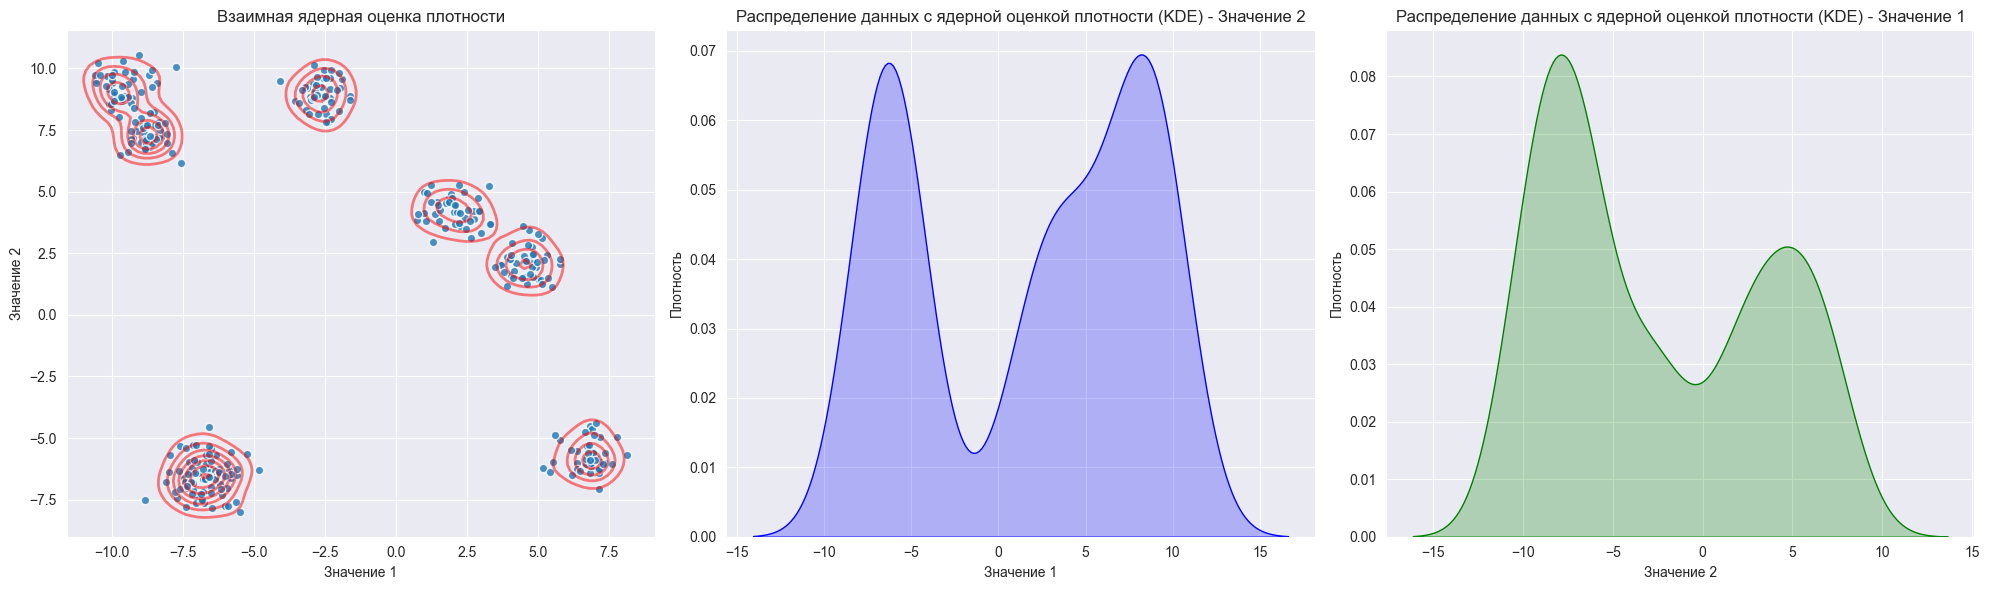

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.neighbors import KernelDensity

X, cluster = make_blobs(n_samples=350,
                        centers=8,
                        random_state=42,
                        cluster_std=0.6)

# Восстановление плотности с использованием ядерной оценки плотности (Kernel Density Estimation)
kde = KernelDensity(kernel='gaussian', bandwidth=0.5)  # Гауссовское ядро, ширина ядра 0.5
kde.fit(X)

# Создание сетки для отображения ядерной оценки плотности
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # Минимальное и максимальное значение по первой компоненте
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # Минимальное и максимальное значение по второй компоненте
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))  # Создание сетки
zz = np.exp(kde.score_samples(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)  # Оценка плотности

# Отображение данных и ядерной оценки плотности
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], alpha=0.8, edgecolors='w')  # Данные
plt.contour(xx, yy, zz, levels=8, linewidths=2, colors='r', alpha=0.5)  # Ядерная оценка плотности
plt.title('Взаимная ядерная оценка плотности')
plt.xlabel('Значение 1')
plt.ylabel('Значение 2')

plt.subplot(1, 3, 2)
sns.kdeplot(
    x=X[:, 1],
    fill=True,
    color='blue',
    levels=10,
    label='Ядерная оценка плотности')

plt.title('Распределение данных с ядерной оценкой плотности (KDE) - Значение 2')
plt.xlabel('Значение 1')
plt.ylabel('Плотность')

plt.subplot(1, 3, 3)
sns.kdeplot(
    x=X[:, 0],
    fill=True,
    color='green',
    levels=10,
    label='Ядерная оценка плотности')

plt.title('Распределение данных с ядерной оценкой плотности (KDE) - Значение 1')
plt.xlabel('Значение 2')
plt.ylabel('Плотность')

plt.tight_layout()
plt.show()

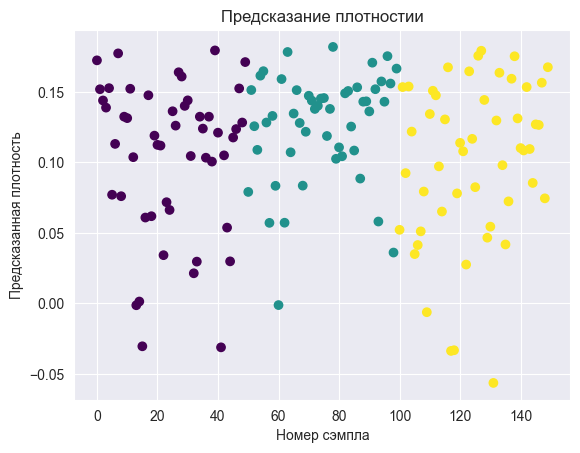

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler # Стандартизация данных
from sklearn.model_selection import GridSearchCV # Поиск по сетке 
from sklearn.ensemble import IsolationForest # Метод Isolation Forest

# Загрузка реальных данных (пример с Iris-датасетом)
# https://archive.ics.uci.edu/ml/datasets/iris
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Выбор числовых признаков
numeric_features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X_real = iris[numeric_features]

# Стандартизация данных (приведение к нулевому среднему и единичной дисперсии)
scaler = StandardScaler()
X_real_scaled = scaler.fit_transform(X_real) # Обучение и применение преобразования

# Описание: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html
# Восстановление плотности с использованием Isolation Forest
isoforest = IsolationForest(contamination=0.05) # 5% аномалий
isoforest.fit(X_real_scaled) # Обучение

# Предсказание "аномальности" (1 - нормальный объект, -1 - аномальный объект)
density_prediction = isoforest.decision_function(X_real_scaled) # Предсказание

# Отображение предсказанных значений плотности
plt.scatter(iris.index, density_prediction, c=iris['class'].astype('category').cat.codes, cmap='viridis') # Предсказанные значения плотности
plt.title('Предсказание плотностии')
plt.xlabel('Номер сэмпла')
plt.ylabel('Предсказанная плотность')
plt.show()

In [5]:
density_prediction

array([ 0.17238077,  0.15189429,  0.14393682,  0.13886402,  0.1526711 ,
        0.07709689,  0.11314143,  0.17731757,  0.0760577 ,  0.13244221,
        0.13141889,  0.15223162,  0.10373328, -0.00124874,  0.00138493,
       -0.03035463,  0.06092006,  0.14762587,  0.06187423,  0.11899844,
        0.11245148,  0.11194811,  0.03424681,  0.07180172,  0.06630134,
        0.13627825,  0.12609656,  0.16393011,  0.16090013,  0.14009529,
        0.1440062 ,  0.1045542 ,  0.02141163,  0.02968313,  0.13244221,
        0.1239872 ,  0.10335162,  0.13244221,  0.10058949,  0.17941561,
        0.12110852, -0.03109736,  0.10502079,  0.05379945,  0.02986395,
        0.11766277,  0.12366263,  0.15246724,  0.12829718,  0.17115985,
        0.07909062,  0.15133081,  0.12568497,  0.10891153,  0.16151714,
        0.16470171,  0.12830965,  0.05715921,  0.13297276,  0.08342696,
       -0.00113313,  0.15909786,  0.05725665,  0.17830045,  0.10718969,
        0.13465394,  0.15126562,  0.12797825,  0.08354885,  0.12